In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Seg3D/KiTS2019/kits19

/content/drive/MyDrive/Seg3D/KiTS2019/kits19


In [3]:
import numpy as np 
import nibabel as nib
import glob
import matplotlib.pyplot as plt

In [4]:
from segment.utils.file_utils import read_yaml_file, load_json_file

configs = read_yaml_file("/content/drive/MyDrive/Seg3D/KiTS2019/kits19/configs/preprocess_pipeline.yaml")["preprocess"]
test_data = load_json_file("/content/drive/MyDrive/Seg3D/KiTS2019/kits19/output/predictions_test.json")["data"]

idc=0
test_data[idc]

{'case_id': 'case_00213',
 'vol_path': '/content/drive/MyDrive/Seg3D/KiTS2019/kits19/data/case_00213/imaging.nii.gz',
 'new_vol_path': '/content/drive/MyDrive/Seg3D/KiTS2019/kits19/output/test_data/vol/case_00213_imaging.nii.gz.npy',
 'npy_seg_path': '/content/drive/MyDrive/Seg3D/KiTS2019/kits19/output/predictions/prediction_00213.nii.gz.npy',
 'nii_seg_path': 'predictions/prediction_00213.nii.gz'}

In [5]:
print(nib.load(test_data[idc]["vol_path"]))
print("\n", "*" * 50)
print(nib.load(test_data[idc]["nii_seg_path"]))

<class 'nibabel.nifti1.Nifti1Image'>
data shape (636, 512, 512)
affine: 
[[ 0.         0.        -0.7734375  0.       ]
 [ 0.        -0.7734375  0.         0.       ]
 [-1.         0.         0.         0.       ]
 [ 0.         0.         0.         1.       ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 636 512 512   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1.        1.        0.7734375 0.7734375 1.        1.        1.
 1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
g

In [6]:
index = np.random.choice(len(test_data))
print(index)
print(test_data[index])

vol_nii = nib.load(test_data[index]["vol_path"])
vol_array = vol_nii.get_fdata()
vol_array = np.clip(vol_array, configs["lower_bound"], configs["upper_bound"])

pred_nii = nib.load(test_data[index]["nii_seg_path"])
pred_array = pred_nii.get_fdata()
print(np.unique(pred_array))

assert vol_array.shape == pred_array.shape, f"{vol_array.shape} {pred_array.shape}" 


2
{'case_id': 'case_00299', 'vol_path': '/content/drive/MyDrive/Seg3D/KiTS2019/kits19/data/case_00299/imaging.nii.gz', 'new_vol_path': '/content/drive/MyDrive/Seg3D/KiTS2019/kits19/output/test_data/vol/case_00299_imaging.nii.gz.npy', 'npy_seg_path': '/content/drive/MyDrive/Seg3D/KiTS2019/kits19/output/predictions/prediction_00299.nii.gz.npy', 'nii_seg_path': 'predictions/prediction_00299.nii.gz'}
[0. 1. 2.]


pos: 337


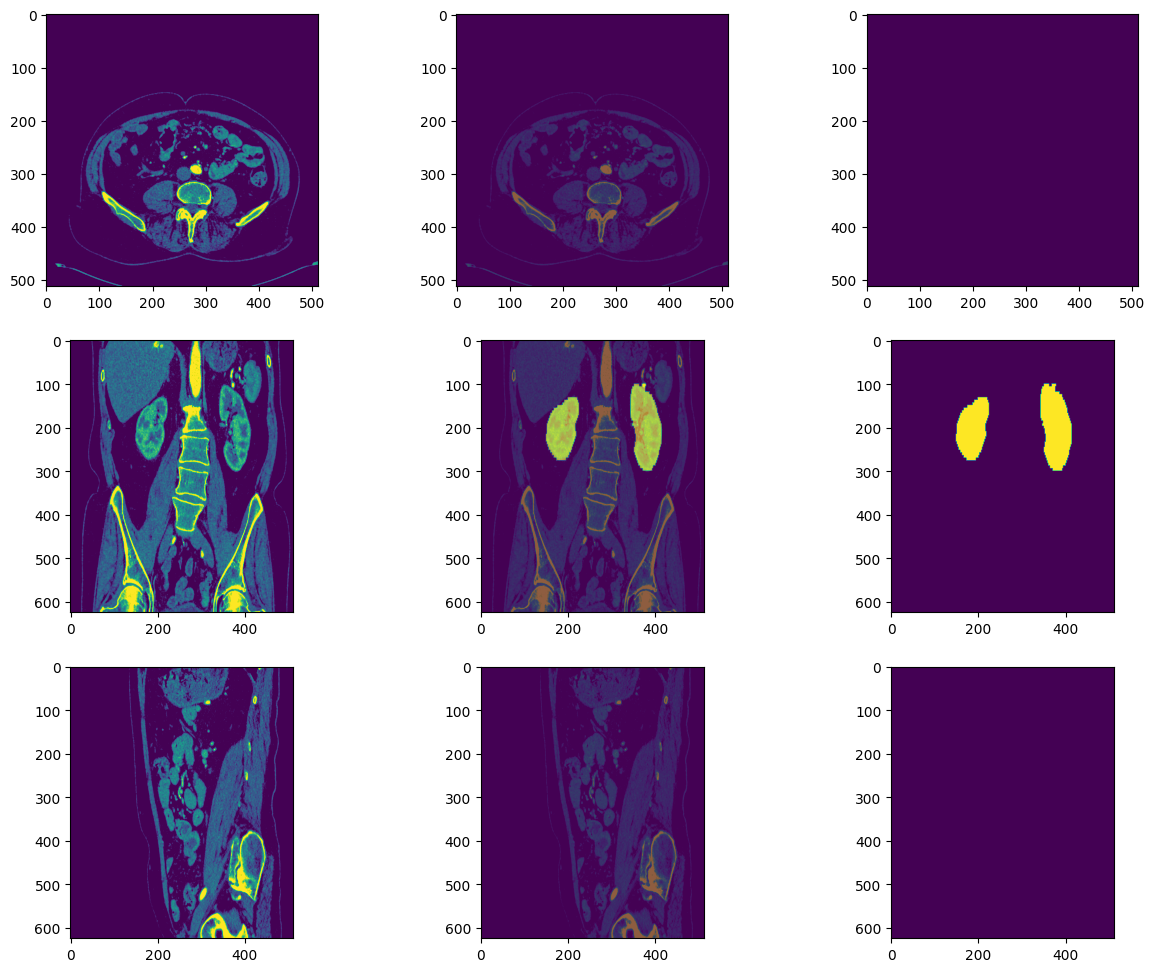

In [7]:
pos = np.where(pred_array.sum(axis=(0,2)) > 1)[0]
slice_index = np.random.choice(len(pos))
pos = pos[slice_index]
print("pos:", pos)

assert vol_array.shape == pred_array.shape, f"{vol_array.shape} {pred_array.shape}" 

fig, axes = plt.subplots(3,3,figsize=(15,12))

axes[0][0].imshow(vol_array[pos])
axes[0][1].imshow(vol_array[pos])
axes[0][1].imshow(pred_array[pos], alpha=0.6)
axes[0][2].imshow(pred_array[pos])

axes[1][0].imshow(vol_array[:,pos])
axes[1][1].imshow(vol_array[:,pos])
axes[1][1].imshow(pred_array[:,pos], alpha=0.6)
axes[1][2].imshow(pred_array[:,pos])

axes[2][0].imshow(vol_array[:,:,pos])
axes[2][1].imshow(vol_array[:,:,pos])
axes[2][1].imshow(pred_array[:,:,pos], alpha=0.6)
axes[2][2].imshow(pred_array[:,:,pos])
